In [538]:
import pandas as pd
import numpy as np

In [539]:
df = pd.read_csv(r"C:\Users\udaya\OneDrive\Desktop\Excel_Tables\ecommerce_dataset_updated.csv")

In [540]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [542]:
df['Product_ID'].unique().size

3660

In [543]:
df.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [544]:
df_category_count = df['Category'].value_counts().reset_index()

C:\Users\udaya\AppData\Local\Temp\ipykernel_28996\3484074859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_category_count , x='Category' , y='count',palette='viridis')


<Axes: xlabel='Category', ylabel='count'>

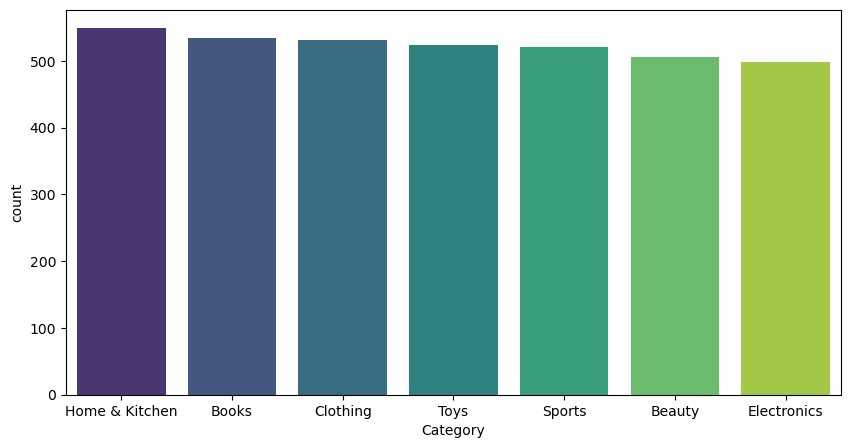

In [545]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data = df_category_count , x='Category' , y='count',palette='viridis')

# BY this the insight is Home&Kitchen is preferring most

In [546]:
df_fprice_of_category = df.groupby(by='Category')['Final_Price(Rs.)'].sum().reset_index()
print(df_fprice_of_category)

         Category  Final_Price(Rs.)
0          Beauty         104215.10
1           Books         111149.35
2        Clothing         115314.84
3     Electronics         100462.23
4  Home & Kitchen         110328.08
5          Sports         108518.79
6            Toys         107289.69


C:\Users\udaya\AppData\Local\Temp\ipykernel_28996\2857093036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_fprice_of_category , x='Category' , y='Final_Price(Rs.)',palette = 'pastel')


<Axes: xlabel='Category', ylabel='Final_Price(Rs.)'>

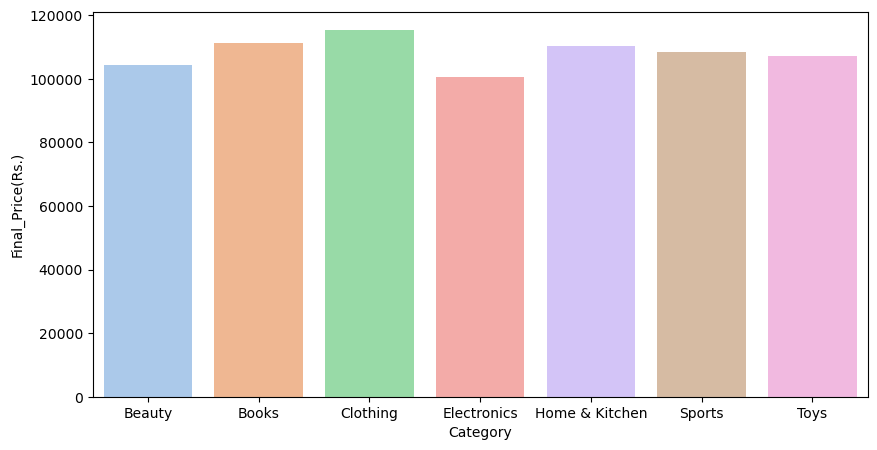

In [547]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_fprice_of_category , x='Category' , y='Final_Price(Rs.)',palette = 'pastel')

#By  this the income comes more from clothing category

In [548]:
df_discount = df.groupby(by='Category')['Discount (%)'].mean().reset_index()
print(df_discount)

         Category  Discount (%)
0          Beauty     18.475248
1           Books     19.035581
2        Clothing     17.919021
3     Electronics     19.267068
4  Home & Kitchen     19.608379
5          Sports     19.326923
6            Toys     18.126195


C:\Users\udaya\AppData\Local\Temp\ipykernel_28996\1200766794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_discount , x='Category' , y='Discount (%)',palette = 'husl')


<Axes: xlabel='Category', ylabel='Discount (%)'>

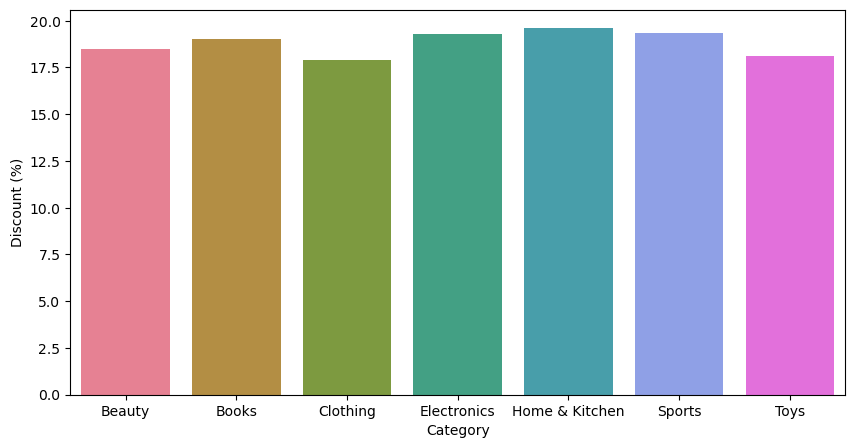

In [549]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_discount , x='Category' , y='Discount (%)',palette = 'husl')

# On an average the discount is more for Home & Kitchen 
# Maybe if discount is given more then buying become more

In [550]:
df_payment_method = df['Payment_Method'].value_counts().reset_index()

In [551]:
df_payment_method

,Payment_Method,count
0,Credit Card,760
1,UPI,757
2,Debit Card,731
3,Net Banking,716
4,Cash on Delivery,696


([<matplotlib.patches.Wedge at 0x1cdd8266900>,
 [Text(0.8741236352031769, 0.6677633341081131, 'Credit Card'),
  Text(-0.4117754424344778, 1.0200200904922854, 'UPI'),
  Text(-1.0955353730224249, -0.09900629503529886, 'Debit Card'),
  Text(-0.2600020615849334, -1.0688306357751842, 'Net Banking'),
  Text(0.9094701281606705, -0.6187601199038396, 'Cash on Delivery')],
 [Text(0.47679471011082375, 0.36423454587715254, '20.8%'),
  Text(-0.2246047867824424, 0.5563745948139738, '20.7%'),
  Text(-0.5975647489213226, -0.05400343365561755, '20.0%'),
  Text(-0.14181930631905454, -0.5829985286046458, '19.6%'),
  Text(0.4960746153603657, -0.33750551994754885, '19.0%')])

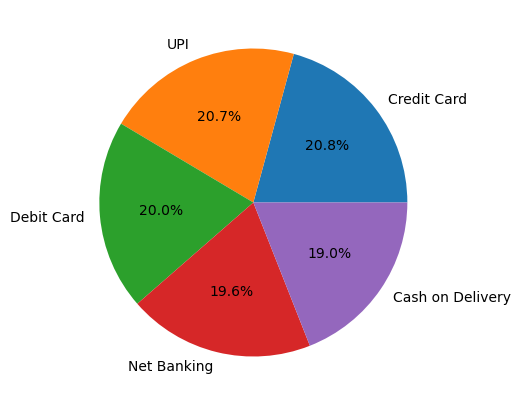

In [552]:
plt.figure(figsize=(10,5))
plt.pie(x = df_payment_method['count'] , labels = df_payment_method['Payment_Method'],autopct = "%1.1f%%")

# give discounts for credit card so peoples can buy

In [553]:
df.corr(numeric_only=True)

,Price (Rs.),Discount (%),Final_Price(Rs.)
Price (Rs.),1.000000,-0.003473,0.935691
Discount (%),-0.003473,1.000000,-0.311515
Final_Price(Rs.),0.935691,-0.311515,1.000000


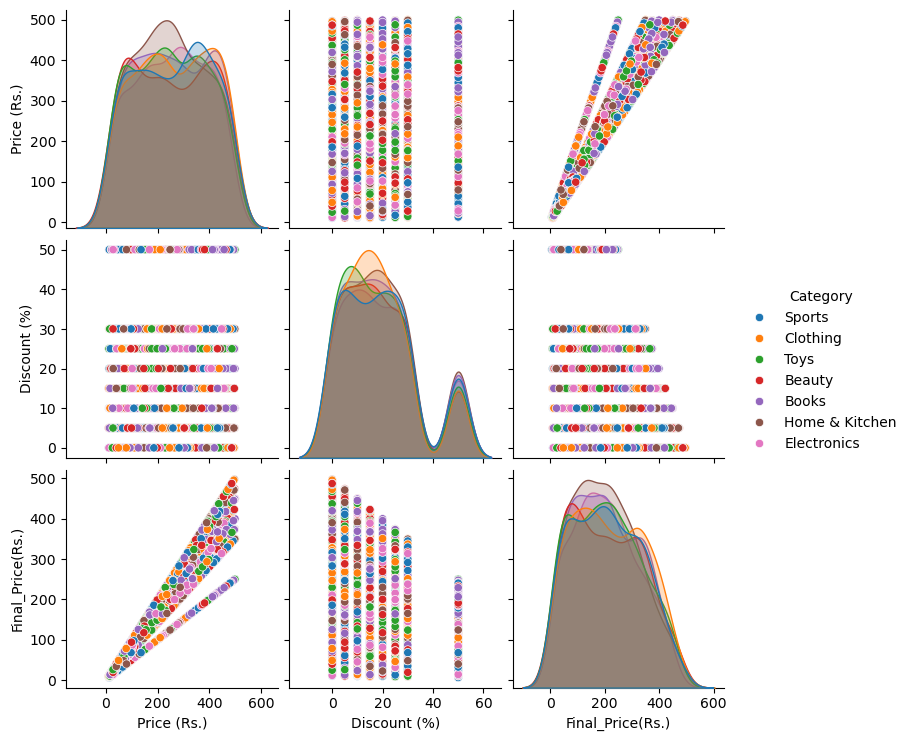

In [554]:
sns.pairplot(df,hue='Category')

In [555]:
df['day'] = df['Purchase_Date'].str.split('-').str[0]
df['month'] = df['Purchase_Date'].str.split('-').str[1]
df['year'] = df['Purchase_Date'].str.split('-').str[2]

In [556]:
df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,day,month,year
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024,12,11,2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024,09,02,2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024,01,09,2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024,01,04,2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024,27,09,2024
...,...,...,...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024,14,05,2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024,19,11,2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024,07,08,2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024,21,05,2024


In [557]:
df_month_purchase_analysis = df.groupby(by=['month','year'])['User_ID'].count().reset_index(name='count')
df_month_purchase_analysis

,month,year,count
0,01,2024,340
1,02,2024,308
2,03,2024,355
3,04,2024,362
4,05,2024,333
5,06,2024,323
6,07,2024,346
7,08,2024,344
8,09,2024,342
9,10,2024,362


C:\Users\udaya\AppData\Local\Temp\ipykernel_28996\3866458781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_month_purchase_analysis,x='month',y='count',palette = "flare")


<Axes: xlabel='month', ylabel='count'>

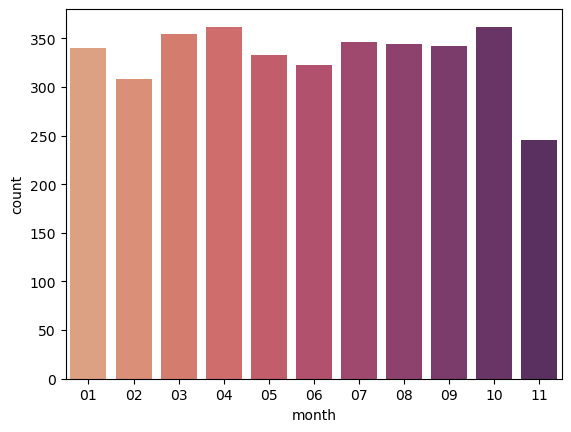

In [558]:
sns.barplot(data=df_month_purchase_analysis,x='month',y='count',palette = "flare")

# sales is higher in october and low in november

<Axes: >

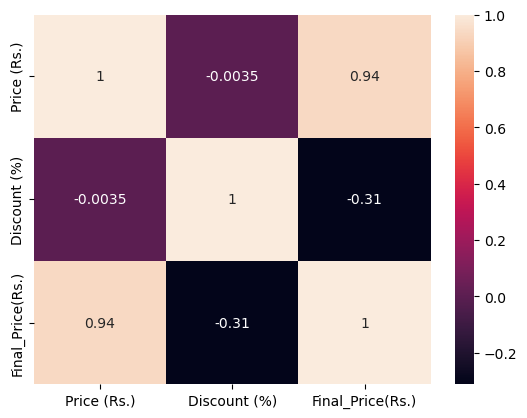

In [559]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True, fmt='.2g')

In [560]:
df['day'] = df['day'].astype('int32')
df['month'] = df['month'].astype('int32')
df['year'] = df['year'].astype('int32')

In [561]:
df.drop(columns = ['Purchase_Date'],inplace=True)

In [562]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Category'] = l.fit_transform(df['Category'])
le = LabelEncoder()
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,day,month,year
0,337c166f,f414122f-e,5,36.53,15,31.05,3,12,11,2024
1,d38a19bf,fde50f9c-5,2,232.79,20,186.23,3,9,2,2024
2,d7f5f0b0,0d96fc90-3,5,317.02,25,237.76,1,1,9,2024
3,395d4994,964fc44b-d,6,173.19,25,129.89,4,1,4,2024
4,a83c145c,d70e2fc6-e,0,244.80,20,195.84,3,27,9,2024


In [563]:
temp = df.groupby(by = "month")['Payment_Method'].value_counts().reset_index()
dict={}
j=1
k=0
for i in temp['month'].to_list():
    if i == j:
        dict[i] = [temp['Payment_Method'][k*5],temp['count'][k*5]]
        j=j+1
        k=k+1

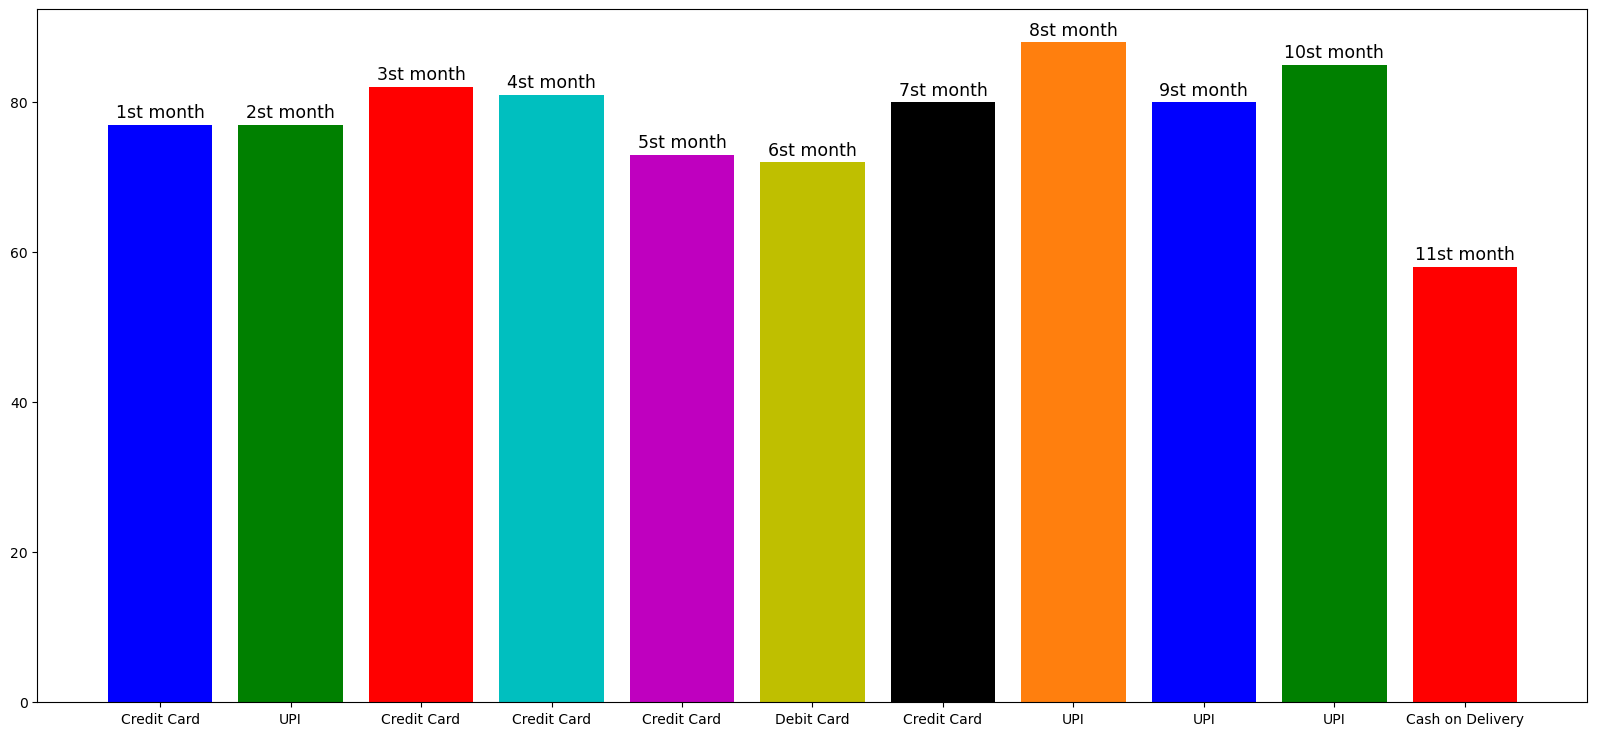

In [564]:
L = list(dict.keys())
xaxis,yaxis=[],[]
for i in L:
    xaxis.append(le.inverse_transform([dict[i][0]])[0])
    yaxis.append(dict[i][1])
plt.figure(figsize=(20,9))
my_colors = ['b','g','r','c','m','y','k','tab:orange']
bar = plt.bar(L,yaxis,color=my_colors)
plt.xticks(L, xaxis, fontsize=10)
for i in range(0,len(L)):
    plt.text(bar[i].get_x() + bar[i].get_width() / 2,  
             bar[i].get_height() + 1.0, 
             f'{i+1}st month',  
             ha='center', fontsize=12.5)



# every month highest or maximun used payment_method

In [565]:
temp = df.groupby(by = "month")['Category'].value_counts().reset_index()
dict={}
j=1
k=0
for i in temp['month'].to_list():
    if i == j:
        dict[i] = [temp['Category'][k*5],temp['count'][k*5]]
        j=j+1
        k=k+1

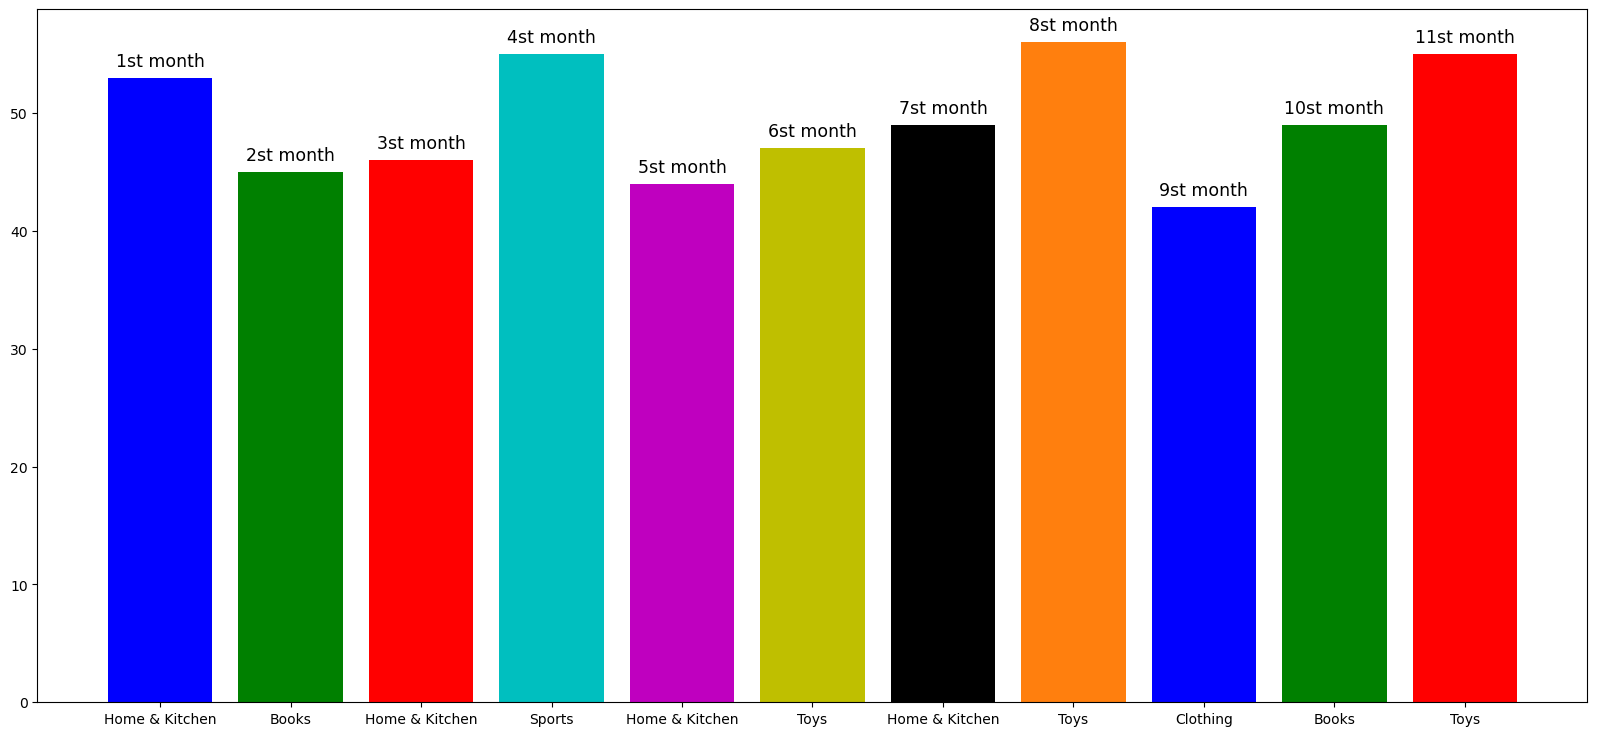

In [566]:
L = list(dict.keys())
xaxis,yaxis=[],[]
for i in L:
    xaxis.append(l.inverse_transform([dict[i][0]])[0])
    yaxis.append(dict[i][1])
plt.figure(figsize=(20,9))
my_colors = ['b','g','r','c','m','y','k','tab:orange']
bar = plt.bar(L,yaxis,color=my_colors)
plt.xticks(L, xaxis, fontsize=10)
for i in range(0,len(L)):
    plt.text(bar[i].get_x() + bar[i].get_width() / 2,  
             bar[i].get_height() + 1.0, 
             f'{i+1}st month',  
             ha='center', fontsize=12.5)

# every month highest or maximun scales Category

In [567]:
temp=df.iloc[:,3:5].values
x = pd.DataFrame(temp,columns=['Price (Rs.)','Discount (%)'])
y=df['Final_Price(Rs.)']

In [568]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [569]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [570]:
from sklearn.metrics import r2_score
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)
print(f'Train predicted score ---> {r2_score(y_train,y_pred_train)}')
print(f'Test predicted score ---> {r2_score(y_test,y_pred_test)}')

Train predicted score ---> 0.9718284907669529
Test predicted score ---> 0.9648438931112711


In [571]:
temp=df.iloc[:,3:6].values
data = pd.DataFrame(temp,columns=['Price (Rs.)','Discount (%)','Final_Price(Rs.)'])

In [572]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data,columns=['Price (Rs.)','Discount (%)','Final_Price(Rs.)'])
data.head()

,Price (Rs.),Discount (%),Final_Price(Rs.)
0,-1.540771,-0.259695,-1.433562
1,-0.155373,0.079764,-0.168553
2,0.439206,0.419222,0.251513
3,-0.576089,0.419222,-0.627830
4,-0.070595,0.079764,-0.090213


In [573]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [574]:
neighbor = NearestNeighbors(n_neighbors=6)
neighbor_fit = neighbor.fit(data)
distance,indexes = neighbor_fit.kneighbors(data)

In [575]:
distance = np.sort(distance,axis=0)
dis = distance[:,1]

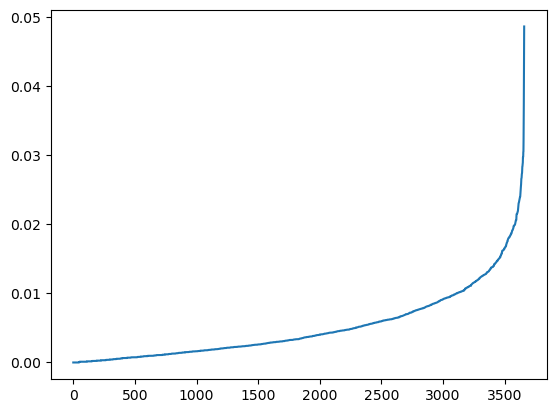

In [576]:
plt.plot(dis)

In [577]:
from sklearn.cluster import DBSCAN
cls = DBSCAN(eps=0.02, min_samples=6).fit(data)
datasetDBSCAN = data.copy()
datasetDBSCAN.loc[:,'cluster'] = cls.labels_ 
cluster_df = datasetDBSCAN['cluster'].value_counts().reset_index()
print(cluster_df)
noise_points = datasetDBSCAN[datasetDBSCAN['cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")

     cluster  count
0         -1   1590
1          4     49
2         30     20
3         24     19
4         63     19
..       ...    ...
221      198      5
222      204      4
223      164      4
224      217      4
225      210      3

[226 rows x 2 columns]
Number of noise points: 1590


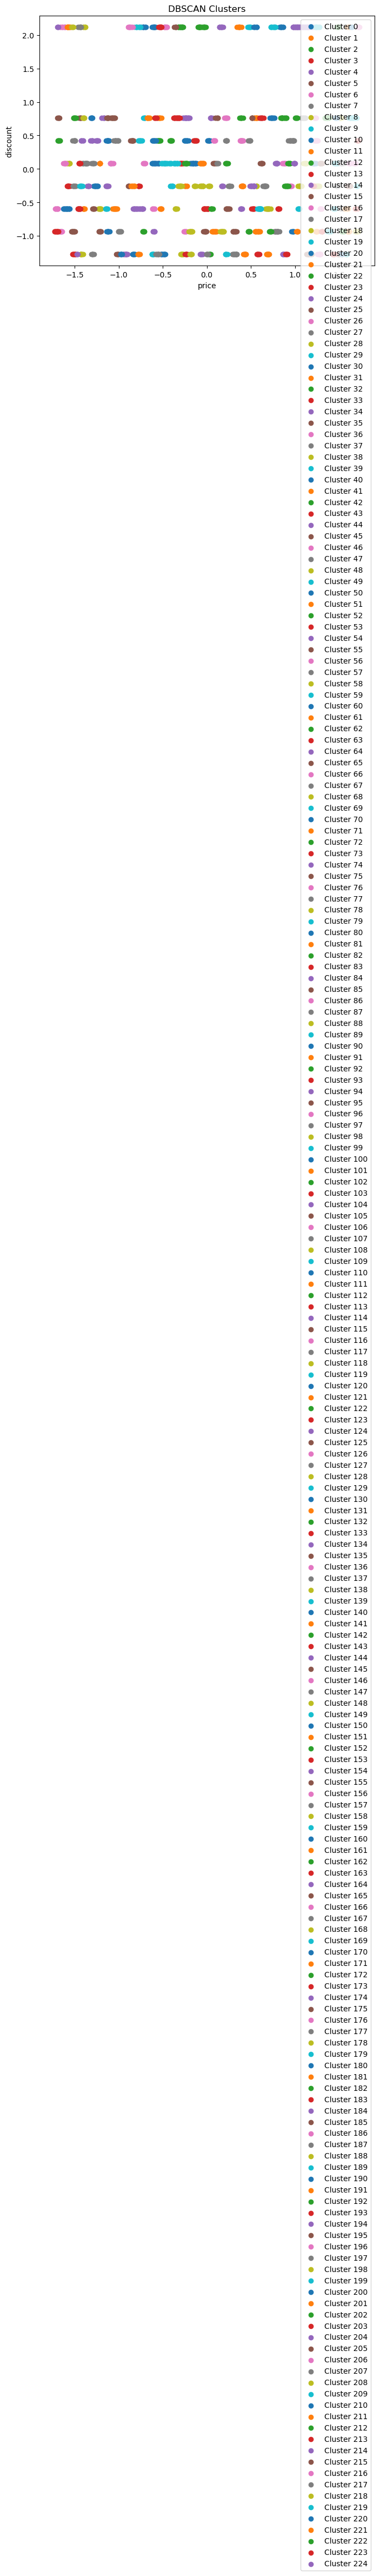

In [578]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in set(cls.labels_): 
    if cluster != -1:
        cluster_points = datasetDBSCAN[datasetDBSCAN['cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}')

plt.xlabel('price')
plt.ylabel('discount')
plt.title('DBSCAN Clusters')
plt.legend()
plt.show()

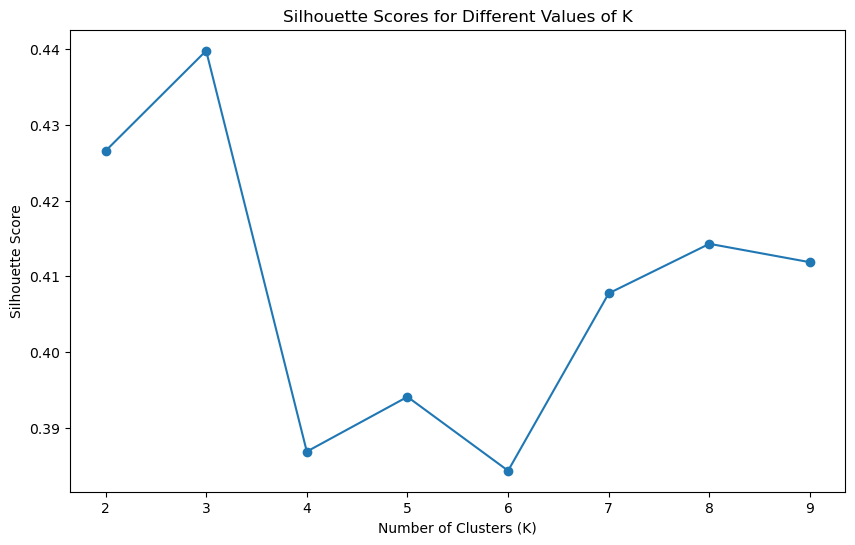

In [579]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Testing different values of K (number of clusters)
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plot silhouette scores to choose the optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

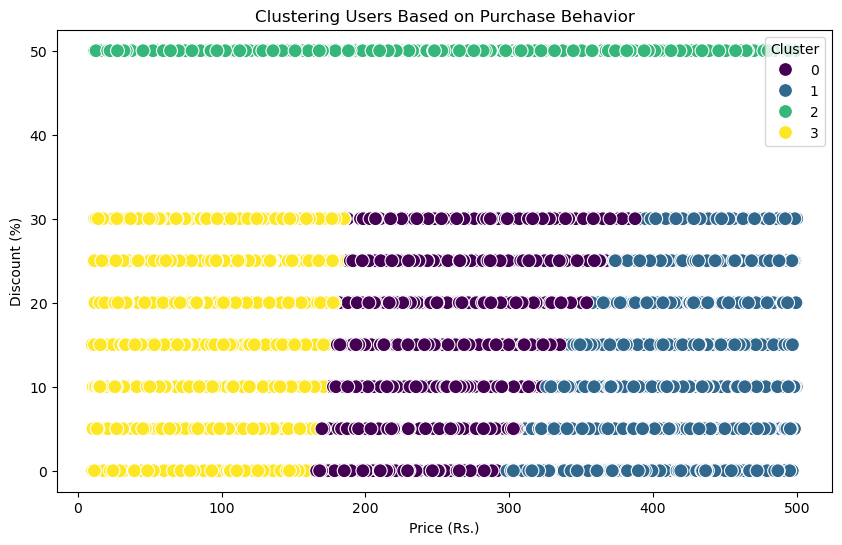

In [626]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price (Rs.)', y='Discount (%)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering Users Based on Purchase Behavior')
plt.xlabel('Price (Rs.)')
plt.ylabel('Discount (%)')
plt.legend(title='Cluster')
plt.show()